In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

In [2]:
hotel = wrangle.wrangle_hotel()

Using cached file...


In [3]:
# hotel.loc[134]

# Pos and Negative top words

In [4]:
pos_lemma = ' '.join(hotel.positive_lemma)
neg_lemma = ' '.join(hotel.negative_lemma)

pos_lemma_split = pos_lemma.split()
neg_lemma_split = neg_lemma.split()

pos_uni_df = pd.DataFrame(pos_lemma_split).value_counts()
neg_uni_df = pd.DataFrame(neg_lemma_split).value_counts()

top = pd.DataFrame()
top['positive'] = pos_uni_df
top['negative'] = neg_uni_df
top.index.names = ['words']

# top.head(200)

# Topics

In [5]:
def top_topic(review):
    '''
    This function takes in a review and checks for keywords assigned for each topic.
    It assigns a number value to each topic and returns the topic with the highest count.
    '''
    # Make list of words for each topic
    staff_words = ['staff','friendly','helpful','reception','maids','attentive','concierge','service','receptionist']
    
    location_words = ['location','located','view','area','metro','city','central','centre','center','train','access','walk',
                      'public','transport','transportation','downtown','accessible','station','convenient','shop','distance']
    
    room_words = ['room','bed','matress','bathroom','spacious','shower','suite','pillow','bedroom','conditioning','bathtub','air',
                  'window','conditioned','double','twin','size','single','noise','tv','bath','carpet','tile','noisy','small',
                  'furniture','quiet','toilet']
    
    facilities_words = ['facilities','breakfast','security','buffet','restaurant','bar','coffee','tea','pool','wifi','facility',
                        'parking','lobby','lounge','drink','hall','corridor','menu','storage','order','dining']
    
    value_words = ['value','money','cheap','cheapest','expensive','price','priced','cost']
    
    hotel_words = ['hotel']
    
    comfort_words = ['nothing','everything','atmosphere','good','comfortable','comfort','uncomfortable','pretty','clean','experience']

    # Make a dictionary to check for topic words and a dictionary to keep topic counts per review
    topic_dict = {'staff':staff_words,'location':location_words,'room':room_words,'facilities':facilities_words,
                  'value':value_words,'hotel':hotel_words,'comfort':comfort_words}
    
    topic_count = {'staff' : 0, 'location' : 0, 'room' : 0, 'facilities' : 0, 'value' : 0, 'hotel': 0, 'comfort': 0}
    
    # Check the review for the topics
    if review == '':
        return 'blank'
    
    elif review.isnumeric():
        return 'number'
    
    for word in review.split():
        if word in topic_dict['staff']:
            topic_count['staff'] += 1
        
        elif word in topic_dict['location']:
            topic_count['location'] += 1
        
        elif word in topic_dict['room']:
            topic_count['room'] += 1
        
        elif word in topic_dict['facilities']:
            topic_count['facilities'] += 1
        
        elif word in topic_dict['value']:
            topic_count['value'] += 1
        
        elif word in topic_dict['hotel']:
            topic_count['hotel'] += 1
        
        elif word in topic_dict['comfort']:
            topic_count['comfort'] += 1
    
    if all(value == 0 for value in topic_count.values()):
        return 'no_topic'
    
    else:
        return max(topic_count, key = topic_count.get)

In [6]:
hotel['positive_topic'] = hotel.positive_lemma.apply(top_topic)
hotel['negative_topic'] = hotel.negative_lemma.apply(top_topic)

In [7]:
hotel.positive_topic.value_counts(dropna=False)

staff         162166
location      128145
room           86280
blank          36624
comfort        34567
facilities     30825
no_topic       20761
hotel          11880
value           4475
number            15
Name: positive_topic, dtype: int64

In [8]:
hotel.negative_topic.value_counts(dropna=False)

room          167663
blank         153094
facilities     58604
no_topic       41819
staff          33016
location       24982
comfort        17177
hotel          10533
value           8842
number             8
Name: negative_topic, dtype: int64

In [9]:
hotel.positive_lemma[hotel.positive_topic == 'no_topic'].head(10)

134            stayed ride london well prepared
197                 proximity kensington garden
208                                  evry thing
273                                       thank
291    upgrade lovely surprise cake anniversary
293                                     recipnt
408                      every thing else great
451                              excellent stay
542                     felt whole place shoddy
594        luxury lovely people heart amsterdam
Name: positive_lemma, dtype: object

In [10]:
hotel.negative_lemma[hotel.negative_topic == 'no_topic'].head()

23                                                                                                                                                                                                                                                                              leave
214                                                                                                                                                                                                                                               sum expense time book print booking
232                                                                                                                                                                                                                                      spare phone charger plug converter available
386    alzheimers early onset tried pay online four people party hour confusion desk people trying process card make several phone call bank told card fine could proc

In [11]:
hotel.to_csv('hotel_topic.csv')

In [12]:
# hotel[['country','nps_group','group_type','positive_topic','negative_topic','pos_lem_sentiment_score','neg_lem_sentiment_score']].head()

<AxesSubplot:ylabel='positive_topic'>

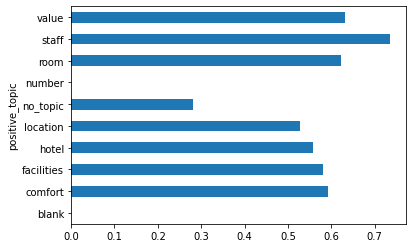

In [13]:
hotel.groupby(['positive_topic'])['pos_lem_sentiment_score'].mean().plot.barh()

<AxesSubplot:ylabel='negative_topic'>

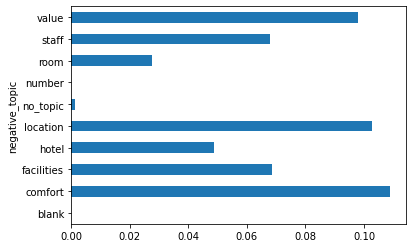

In [14]:
hotel.groupby(['negative_topic'])['neg_lem_sentiment_score'].mean().plot.barh()

<AxesSubplot:xlabel='positive_topic', ylabel='count'>

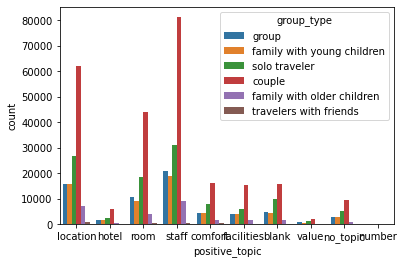

In [15]:
sns.countplot(x='positive_topic',data=hotel,hue='group_type')

<AxesSubplot:xlabel='negative_topic', ylabel='count'>

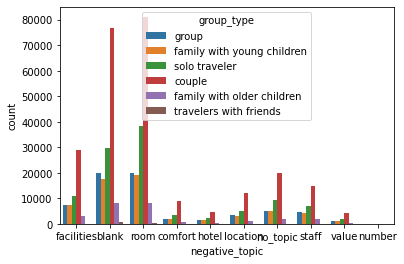

In [16]:
sns.countplot(x='negative_topic',data=hotel,hue='group_type')

In [17]:
# ['month_name','month','year','day_name','day','quarter','hotel_name','street','city','zip_code','country','lat','lng',
#  'additional_number_of_scoring','average_score','total_number_of_reviews','reviewer_nationality','trip_type','nights_stayed',
#  'group_type','total_number_of_reviews_reviewer_has_given','reviewer_score','nps_group','days_since_review','neg_sentiment_score',
#  'neg_lem_sentiment_score','review_total_negative_word_counts','negative_unique_word_count','negative_topic','pos_sentiment_score',
#  'review_total_positive_word_counts','positive_unique_word_count','pos_lem_sentiment_score','postive_topic','negative_review',
#  'negative_clean_review','negative_lemma','positive_review','positive_clean_review','positive_lemma']

In [18]:
staff_words = ['staff','friendly','helpful','reception','maids','attentive','concierge','service','receptionist']    
location_words = ['location','located','view','area','metro','city','central','centre','center','train','access','walk',
                      'public','transport','transportation','downtown','accessible','station','convenient','shop','distance']    
room_words = ['room','bed','matress','bathroom','spacious','shower','suite','pillow','bedroom','conditioning','bathtub','air',
                  'window','conditioned','double','twin','size','single','noise','tv','bath','carpet','tile','noisy','small',
                  'furniture','quiet','toilet']    
facilities_words = ['facilities','breakfast','security','buffet','restaurant','bar','coffee','tea','pool','wifi','facility',
                        'parking','lobby','lounge','drink','hall','corridor','menu','storage','order','dining']   
value_words = ['value','money','cheap','cheapest','expensive','price','priced','cost']    
hotel_words = ['hotel']    
comfort_words = ['comfort','nothing','everything','atmosphere','good','comfortable','uncomfortable','pretty','clean','experience']

topic_dict = {'staff':staff_words,'location':location_words,'room':room_words,'facilities':facilities_words,
                  'value':value_words,'hotel':hotel_words,'comfort':comfort_words}

new_topic = pd.DataFrame.from_dict(topic_dict, orient='index')

# new_topic

In [19]:
staff_words = ['staff','friendly','helpful','reception','maids','attentive','concierge','service','receptionist']    
location_words = ['location','located','view','area','metro','city','central','centre','center','train','access','walk',
                      'public','transport','transportation','downtown','accessible','station','convenient','shop','distance']    
room_words = ['room','bed','matress','bathroom','spacious','shower','suite','pillow','bedroom','conditioning','bathtub','air',
                  'window','conditioned','double','twin','size','single','noise','tv','bath','carpet','tile','noisy','small',
                  'furniture','quiet','toilet']    
facilities_words = ['facilities','breakfast','security','buffet','restaurant','bar','coffee','tea','pool','wifi','facility',
                        'parking','lobby','lounge','drink','hall','corridor','menu','storage','order','dining']   
value_words = ['value','money','cheap','cheapest','expensive','price','priced','cost']    
hotel_words = ['hotel']    
comfort_words = ['comfort','nothing','everything','atmosphere','good','comfortable','uncomfortable','pretty','clean','experience']

manual_topics = pd.DataFrame()
topics = ['Staff','Locations','Room','Facilities','Value','Hotel','Comfort']
lists = [staff_words,location_words,room_words,facilities_words,value_words,hotel_words,comfort_words]
manual_topics['Topics'] = topics
manual_topics['Words'] = lists
# manual_topics

In [20]:
from itertools import chain
topics = list(chain(*topic_dict.values()))
len(topics)

98

In [21]:
# first_counts.sort_index()
# second_counts.sort_index()

# new_df = pd.Dataframe()

# new_df['topics'] = value_counts.index
# new_df['first_count'] = first_counts.values
# new_df['second_count'] = second_counts.values

In [23]:
hotel.hotel_name.nunique()

1492